In [2]:
%%capture
!pip install tifffile
!pip install zarr
!pip install matplotlib
!pip install imagecodecs
!pip install opencv-python
!pip install scikit-image

In [5]:
import tifffile
import zarr
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage import exposure
from skimage.exposure import match_histograms
import cv2

In [ ]:
store = tifffile.imread('./Calib_Polaris_Scan3.qptiff', aszarr=True)
zarr_pyramids = zarr.open(store, mode='r')
image = np.array(zarr_pyramids[6])
cv2.imwrite('C:\\Users\\slendersold\\Desktop\\bioinf_color\\polaris.png', cv2.cvtColor( image, cv2.COLOR_BGR2RGB))

In [28]:
referencepol = cv2.cvtColor(cv2.imread("./polaris.png",1), cv2.COLOR_BGR2RGB)
imagehur = cv2.cvtColor(cv2.imread("./IHCjul23_020723.png",1), cv2.COLOR_BGR2RGB)
matched = match_histograms(imagehur, referencepol, channel_axis=-1)
cv2.imwrite('C:\\Users\\slendersold\\Desktop\\bioinf_color\\matched.png', matched)

True

Text(0.5, 1.0, 'Matched')

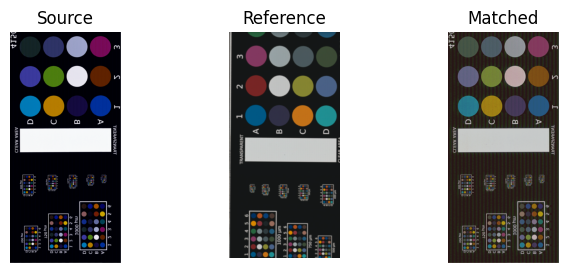

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3), sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(imagehur)
ax1.set_title('Source')
ax2.imshow(referencepol)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

In [18]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>